# Ultra Marathon
[Data Source](https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running)

This dataset contains over 7.4 million ultra-marathon race records from 1.6 million athletes worldwide, spanning 1798 to 2022. It includes data on event names, distances, athlete demographics, and performance metrics.

Download the dataset from Kaggle by searching for "The Big Dataset of Ultra Marathon Running" and logging into your account and save it as 'TWO_CENTURIES_OF_UM_RACES.csv'

## Import dependencies

In [3]:
import sys
!{sys.executable} -m pip install pandas numpy seaborn matplotlib

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import data

In [6]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv', dtype={'Athlete average speed': 'str'})
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


(7461195, 13)

In [7]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


## Clean up data

### Filter only Lithuanian races
1. Extract country data from the "Event name" column into a new column "location".
2. Show only LTU races.


In [14]:
df['Location'] = df['Event name'].str.split('(').str[1].str.rstrip(')')

In [15]:
df = df[df['Location'] == 'LTU']

In [16]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Location
9567,2018,17.03.2018,6 valandų bėgimas Jonava (LTU),6h,23,77.866 km,OK Versmė,LTU,1986.0,M,M23,12.978,8905,LTU
9568,2018,17.03.2018,6 valandų bėgimas Jonava (LTU),6h,23,74.889 km,Tipicnij Maraton,RUS,1977.0,M,M40,12.482,8906,LTU
9569,2018,17.03.2018,6 valandų bėgimas Jonava (LTU),6h,23,73.067 km,Kaščiukai,LTU,1970.0,M,M45,12.178,8907,LTU
9570,2018,17.03.2018,6 valandų bėgimas Jonava (LTU),6h,23,68.593 km,Klub 100 Marathon Danmark,LTU,1981.0,M,M35,11.432,8908,LTU
9571,2018,17.03.2018,6 valandų bėgimas Jonava (LTU),6h,23,67.579 km,NaN,LTU,1983.0,M,M23,11.263,8909,LTU


### Cleanup Values
1. Filter `Event distance/length` column to only include `km` distances.
2. Rename the `Event distance/length` column to `Distance`.
3. Remove `null` values from the `Athlete year of birth` column.
4. Remove `LTU` from the `Event name` column.
5. Convert the `Event dates` column to datetime format.
6. Convert the `Athlete year of birth` column to numeric.
7. Compute `Athlete age` column.
8. Drop unused columns: `Athlete club`, `Athlete year of birth`, `Athlete age category` & `Location`

In [18]:
# Filter rows that contain 'km' and exclude rows with 'h'
df = df[df['Event distance/length'].str.contains('km', na=False)]

In [19]:
# Rename column Event distance/length to distance
df = df.rename(columns={'Event distance/length': 'Distance'})

In [20]:
# Remove null values from 'Athlete year of birth' column
df = df.dropna(subset=['Athlete year of birth'])

In [21]:
# Remove LTU from event name
df['Event name'] = df['Event name'].str.split('(').str.get(0)

In [22]:
# Convert 'Event dates' column to datetime format
df['Event dates'] = pd.to_datetime(df['Event dates'], format='%d.%m.%Y')

In [23]:
# Convert 'Athlete year of birth' to numeric
df['Athlete year of birth'] = pd.to_numeric(df['Athlete year of birth'], errors='coerce')

In [24]:
# Determine athlete age
df['Athlete age'] = df['Year of event'] - df['Athlete year of birth']
df['Athlete age'] = df['Year of event'] - df['Athlete year of birth'].astype(int)

In [25]:
# Remove h from Athlete performance
df['Athlete performance'] = df['Athlete performance'].str.split(' ').str.get(0)

In [26]:
#Drop columns: Athlete Club, Athlete year of birth, Athlete age category, location
df = df.drop(['Athlete club', 'Athlete year of birth', 'Athlete age category', 'Location'], axis=1)

### Verify the dataset
1. Report `null` values.
2. Report duplicates.
3. Reset index.

In [28]:
#Check for null values
df.isna().sum()

Year of event                0
Event dates                  0
Event name                   0
Distance                     0
Event number of finishers    0
Athlete performance          0
Athlete country              0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
Athlete age                  0
dtype: int64

In [29]:
#Check for dupes
df[df.duplicated() == True]

,Year of event,Event dates,Event name,Distance,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,Athlete age


In [30]:
#Reset index
df = df.reset_index(drop=True)

In [31]:
df.head()

,Year of event,Event dates,Event name,Distance,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,Athlete age
0,2018,2018-06-16,Kernavė - Vilnius Trail,82km,31,6:52:00,LTU,M,11.942,149620,32
1,2018,2018-06-16,Kernavė - Vilnius Trail,82km,31,7:29:33,LTU,M,10.944,8905,32
2,2018,2018-06-16,Kernavė - Vilnius Trail,82km,31,7:35:04,LTU,M,10.812,149621,41
3,2018,2018-06-16,Kernavė - Vilnius Trail,82km,31,8:34:42,LTU,M,9.559,8907,48
4,2018,2018-06-16,Kernavė - Vilnius Trail,82km,31,8:36:54,GER,M,9.518,149624,41


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year of event              1570 non-null   int64         
 1   Event dates                1570 non-null   datetime64[ns]
 2   Event name                 1570 non-null   object        
 3   Distance                   1570 non-null   object        
 4   Event number of finishers  1570 non-null   int64         
 5   Athlete performance        1570 non-null   object        
 6   Athlete country            1570 non-null   object        
 7   Athlete gender             1570 non-null   object        
 8   Athlete average speed      1570 non-null   object        
 9   Athlete ID                 1570 non-null   int64         
 10  Athlete age                1570 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 135.1+ KB


### Fix data types
1. `Athlete age`: int
2. `Athlete average speed`: float
3. `Event date` : datetime64[ns]
4. `Distance`: float

In [34]:
df['Athlete age'] = df['Athlete age'].astype(int)

In [35]:
df['Athlete average speed'] = df['Athlete average speed'].astype(float)

In [36]:
#Remove 'km' suffix in distance column and convert to string
df['Distance'] = df['Distance'].str.replace('km', '').astype(float)
# Round up the values in the 'distance' column
df['Distance'] = np.ceil(df['Distance'])

In [37]:
df.head()

,Year of event,Event dates,Event name,Distance,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,Athlete age
0,2018,2018-06-16,Kernavė - Vilnius Trail,82.0,31,6:52:00,LTU,M,11.942,149620,32
1,2018,2018-06-16,Kernavė - Vilnius Trail,82.0,31,7:29:33,LTU,M,10.944,8905,32
2,2018,2018-06-16,Kernavė - Vilnius Trail,82.0,31,7:35:04,LTU,M,10.812,149621,41
3,2018,2018-06-16,Kernavė - Vilnius Trail,82.0,31,8:34:42,LTU,M,9.559,8907,48
4,2018,2018-06-16,Kernavė - Vilnius Trail,82.0,31,8:36:54,GER,M,9.518,149624,41


### Reshape data
1. Rename columns to `snake_case`.
2. Reorder columns.

In [ ]:
#Rename columns
df = df.rename(columns={'Year of event': 'year',
                        'Event dates': 'race_day',
                        'Event name': 'race_name',
                        'Event number of finishers': 'race_number_of_finishers',
                        'Athlete performance': 'athlete_performance',
                        'Athlete country': 'athlete_country',
                        'Athlete gender': 'gender',
                        'Athlete average speed': 'average_speed',
                        'Athlete ID': 'athlete_id',
                        'Athlete age': 'age',
                        'Distance': 'distance',
                        })

In [ ]:
#Reorder columns
df = df[
    ['year', 'race_day', 'race_name', 'distance', 'athlete_performance', 'athlete_country', 'gender', 'average_speed',
     'age', 'race_number_of_finishers', 'athlete_id']]

## Import weather data for the races
[Data Source](https://www.visualcrossing.com/weather/weather-data-services)

This dataset contains historical weather data, including temperature, precipitation, humidity, and other key weather variables over a specified period. 

Instructions to Access the Dataset:

Visit the weather data platform.
Choose "Lithuania" as the location.
Select the desired date range for the weather data (listed below).
Download the dataset and save it as 'weather_data.csv'.

Get race days

In [ ]:
# Convert race_day to datetime format
df['race_day'] = pd.to_datetime(df['race_day'])

# Format the dates to 'yyyy-MM-dd'
df['race_day'] = df['race_day'].dt.strftime('%Y-%m-%d') 

# Sort and get unique values
unique_race_days = df.sort_values(by=['race_day'])['race_day'].unique()

# Output the result
print(unique_race_days)

In [ ]:
# Get a race date range
print(f"From: {df['race_day'].min()}, to: {df['race_day'].max()}")

In [ ]:
# Import weather dataset
weather_df = pd.read_csv('weather_data.csv')
weather_df.info()

In [ ]:
#Convert data type to datetime
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

In [ ]:
weather_df.head()

## Merge the datasets

In [ ]:
# Convert race_day to datetime format
df['race_day'] = pd.to_datetime(df['race_day'])

In [ ]:
# Merge the DataFrames on 'race_day' and 'datetime'
df2 = pd.merge(df, weather_df, left_on='race_day', right_on='datetime', how='inner') 

In [ ]:
# Rename column 'icon'
df2.rename(columns={'icon': 'weather_description'}, inplace=True)

In [ ]:
# Check for null values
df2.isnull().sum()

In [ ]:
# Replace NaN values in the 'preciptype' column with 'no rain'
df2.fillna({'preciptype': 'no rain'}, inplace=True)

In [ ]:
# Drop columns
df2.drop(columns=['tempmax', 'tempmin', 'moonphase'], inplace=True)

## Visualise

### Gender distribution
Distribution of athletes by gender, with the x-axis representing gender (male and female) and the y-axis indicating the count of athletes in each group

In [ ]:
# Suppress FutureWarning related to deprecated 'use_inf_as_na' option in Seaborn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

C:\Users\annas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gender', ylabel='Count'>

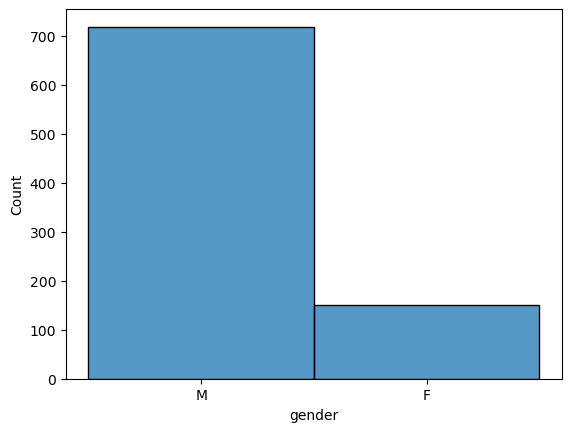

In [97]:
#Is long distance running more popular among men or women?
sns.histplot(df2['gender'])

### Age distribution
Distribution of athletes by age, with the x-axis representing age and the y-axis showing the number of athletes in each age group.

C:\Users\annas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

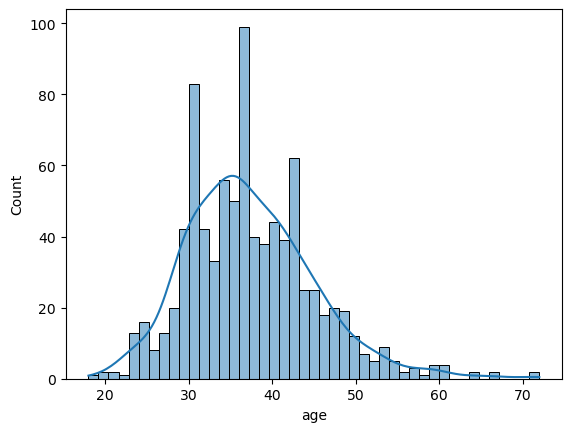

In [93]:
#What is age distribution?
sns.histplot(df2['age'], kde='True', bins=45)

In [94]:
#How old is the oldest runner?
f'Oldest runner: {df2['age'].max()}'

SyntaxError: f-string: unmatched '[' (4259986835.py, line 2)

In [140]:
#How old is the youngest runner?
f'Youngest runner: {df2['age'].min()}'

SyntaxError: f-string: unmatched '[' (2088263605.py, line 2)

In [142]:
#How old is the oldest female runner?
f'Oldest female runner: {df2[df2['gender'] == 'F']['age'].max()}'

SyntaxError: f-string: unmatched '[' (2671144739.py, line 2)

In [97]:
#What is median runner age?
f'Median runner age: {df2['age'].median()}'

SyntaxError: f-string: unmatched '[' (1500495042.py, line 2)

C:\Users\annas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\annas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


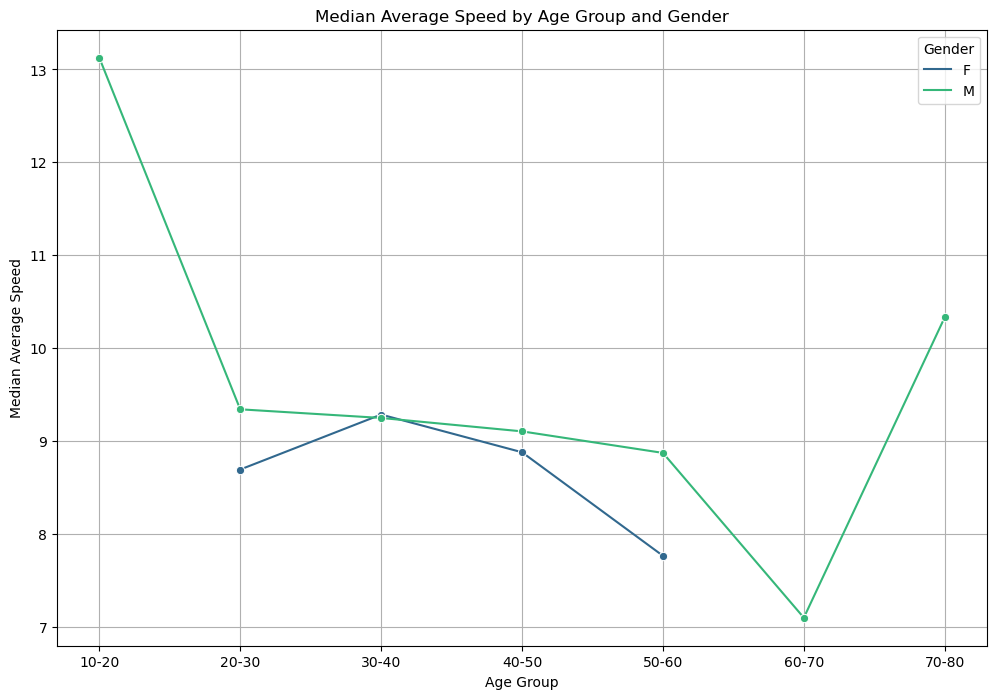

In [99]:
#Does average runner speed change with age?

#Define age bins and labels
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

#Create a new column 'age_group' with age categories
df2['age_group'] = pd.cut(df2['age'], bins=age_bins, labels=age_labels, right=False)

#Group by 'age_group' and 'gender', and calculate the median average speed
median_speed_per_age_group_gender = df2.groupby(['age_group', 'gender'],observed=False)['average_speed'].median().reset_index()

#Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=median_speed_per_age_group_gender, x='age_group', y='average_speed', hue='gender', marker='o',
             palette='viridis')

#Customize the plot
plt.title('Median Average Speed by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Median Average Speed')
plt.legend(title='Gender')
plt.grid(True)

#Show the plot
plt.show()

In [100]:
#Difference in speed for different distances male to female
df2.groupby(['distance', 'gender'])['average_speed'].mean()

distance  gender
48.0      F          8.827889
          M          9.167269
50.0      F         10.300190
          M         11.283148
71.0      F          8.733552
          M          9.184721
82.0      F          8.149500
          M          8.210203
100.0     F          9.707267
          M         10.179848
Name: average_speed, dtype: float64

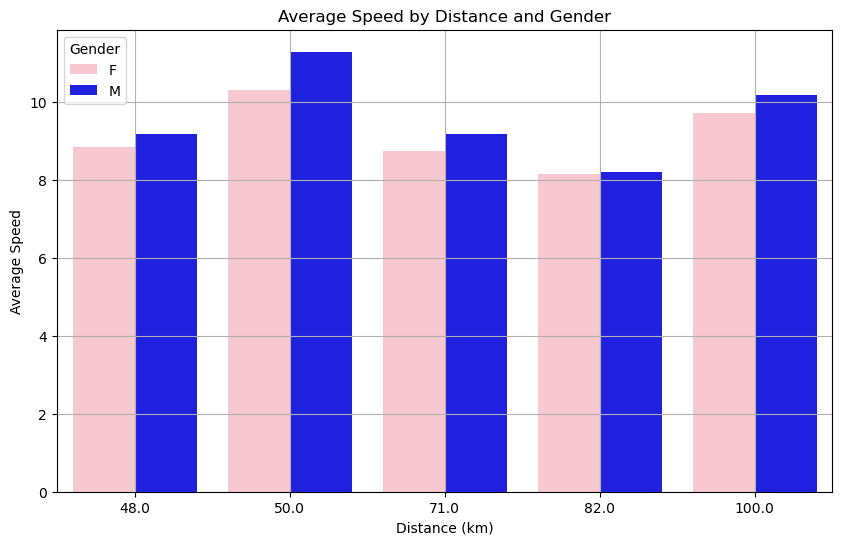

In [101]:
#Average speed for different distances male to female visualisation

#Calculate the average speed by distance and gender
avg_speed_df = df2.groupby(['distance', 'gender'])['average_speed'].mean().reset_index()

# Define custom color palette
custom_palette = {'M': 'blue', 'F': 'pink'}

#Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_speed_df, x='distance', y='average_speed', hue='gender', palette=custom_palette)

#Customize the plot
plt.title('Average Speed by Distance and Gender')
plt.xlabel('Distance (km)')
plt.ylabel('Average Speed')
plt.legend(title='Gender')
plt.grid(True)

#Show the plot
plt.show()

<Axes: xlabel='distance', ylabel='average_speed'>

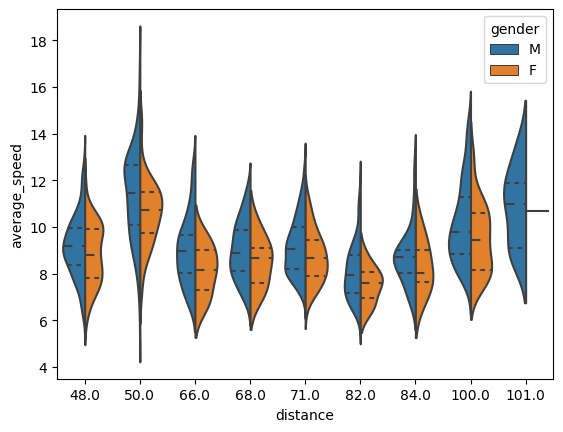

In [102]:
#Violinplot for average speed for different distances male to female
sns.violinplot(data=df, x='distance', y='average_speed', hue='gender', split=True, inner='quart')

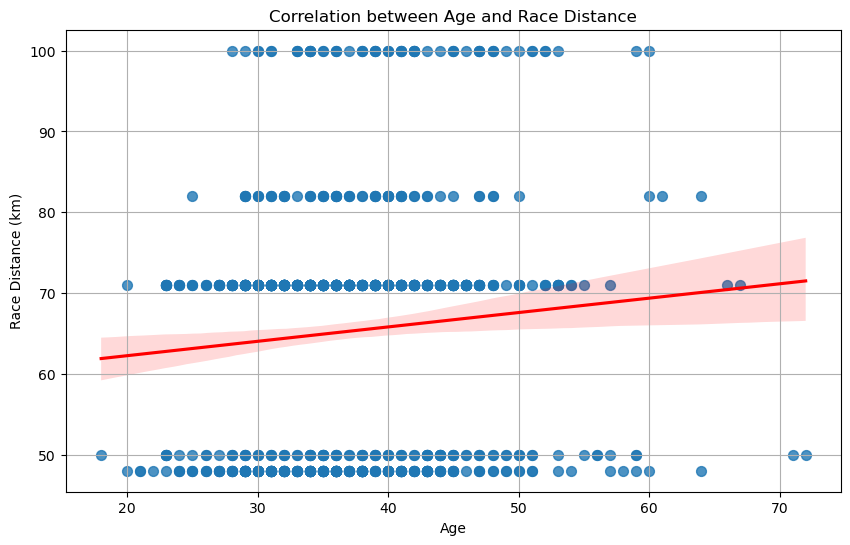

In [106]:
#Is there a correlation between age group and race distance?

#Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df2, x='age', y='distance', scatter_kws={'s': 50}, line_kws={'color': 'red'})

#Customize the plot
plt.title('Correlation between Age and Race Distance')
plt.xlabel('Age')
plt.ylabel('Race Distance (km)')
plt.grid(True)

#Show the plot
plt.show()



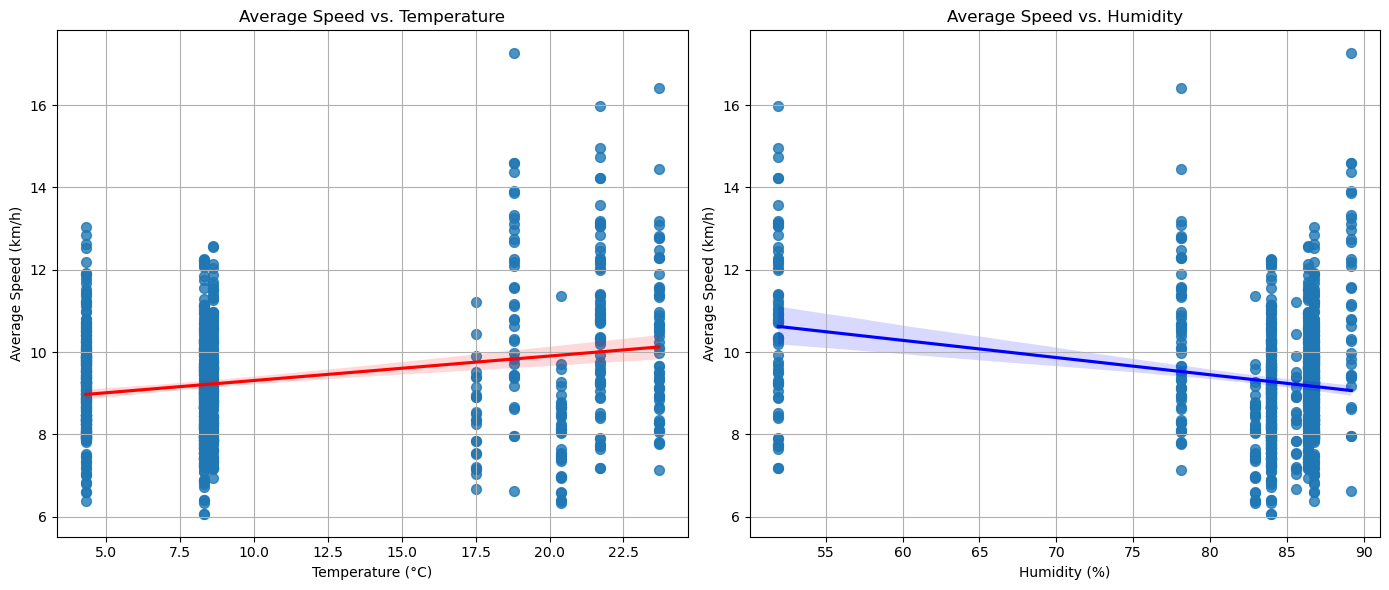

In [107]:
#Does temperature or humidity affect the average speed of racers?

#Set up the plotting area
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Scatter plot for temperature vs. average speed
sns.regplot(data=df2, x='temp', y='average_speed', scatter_kws={'s': 50}, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_title('Average Speed vs. Temperature')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Average Speed (km/h)')
axes[0].grid(True)

#Scatter plot for humidity vs. average speed
sns.regplot(data=df2, x='humidity', y='average_speed', scatter_kws={'s': 50}, line_kws={'color': 'blue'}, ax=axes[1])
axes[1].set_title('Average Speed vs. Humidity')
axes[1].set_xlabel('Humidity (%)')
axes[1].set_ylabel('Average Speed (km/h)')
axes[1].grid(True)

#Adjust layout
plt.tight_layout()
plt.show()

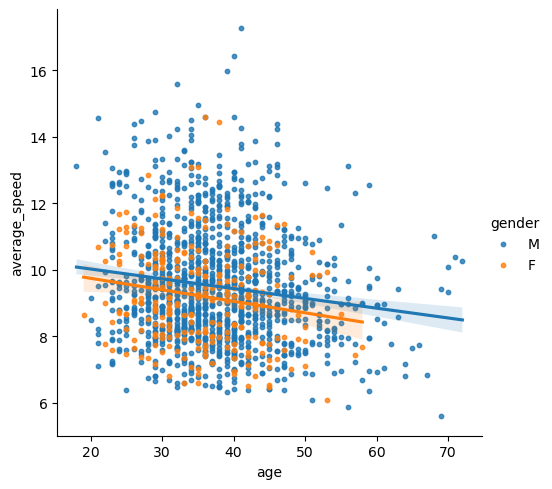

In [109]:
#Does average speed decline with age?

sns.lmplot(data=df, x='age', y='average_speed', hue='gender', scatter_kws={'s': 10})

In [110]:
#Does precipitation affect the male vs female ration of racers?

# Aggregate the data
gender_distribution = df2.groupby(['preciptype', 'gender']).size().unstack(fill_value=0)

# Calculate male-to-female ratio
gender_distribution['ratio'] = gender_distribution['M'] / gender_distribution['F']
print(gender_distribution)

gender       F    M     ratio
preciptype                   
no rain     79  377  4.772152
rain        71  342  4.816901


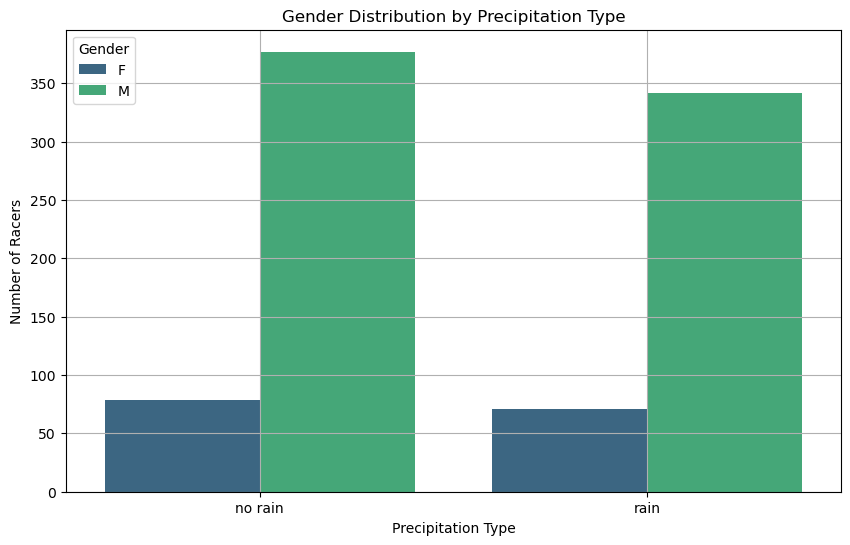

In [111]:
#Does precipitation affect the male vs female ration of racers? visualisation

#Aggregate the data
gender_distribution = df2.groupby(['preciptype', 'gender']).size().reset_index(name='count')

#Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_distribution, x='preciptype', y='count', hue='gender', palette='viridis')

#Customize the plot
plt.title('Gender Distribution by Precipitation Type')
plt.xlabel('Precipitation Type')
plt.ylabel('Number of Racers')
plt.legend(title='Gender')
plt.grid(True)

#Show the plot
plt.show()